# **Petunjuk TTS**

Silakan simpan file ke dalam bentuk **TTS_NIM.ipynb**. Soal terbagi teori dan praktek. Untuk teori langsung tuliskan jawaban dalama bentuk TEXT. Sedangkan untuk praktek, tuliskan koding untuk dapat menampilkan hasil seperti yang diminta.

Setelah selesai mengerjakan, silakan unggah ke GClass. Jangan sampai terlambat ya...keterlambatan mengakibatkan pengurangan nilai TTS.

Have fun!

**SOAL TEORI**

1. Sebutkan ada berapa metodologi data science yang Anda ketahui!
*   CRISP-DM
*   IBM Data Sience
*   SEMMA
*   KDD
*   OSEM
*   TDSP
*   Agile Data Sience

2. Apa perbedaan antara metodologi CRISP-DM dan IBM Data Science? Jelaskan.
Metodologi CRISP-DM fokus pada pemngembangan data dan digunakan secara luas karena fleksibilitas dan detailnya. Sedangkan IBM, metodologi ini mencakup langkah-langkah dari pemahaman masalah hingga penerapan dan penyesuaian berdasarkan umpan balik, mirip dengan pendekatan Agile. Pilihan antara keduanya tergantung pada kebutuhan proyek dan preferensi organisasi dalam hal struktur dan fleksibilitas.


**SOAL PRAKTEK**

### **1. Import Libraries**

In [1]:
# Silakan import librari yang kalian butuhkan (pandas, numpy, matplotlib, seaborn, dan missingno)
!pip install missingno

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import missingno as msno


In [26]:
# Ambil dataset dari (https://github.com/adelnehme/python-for-spreadsheet-users-webinar/blob/master/datasets/airbnb.csv?raw=true) dan simpan dengan nama variabel data
url = 'https://github.com/adelnehme/python-for-spreadsheet-users-webinar/blob/master/datasets/airbnb.csv?raw=true'
data = pd.read_csv(url)

In [27]:
# Lihat 5 data teratas pada DataFrame "data"
data.head()

,Unnamed: 0,listing_id,name,host_id,host_name,neighbourhood_full,coordinates,room_type,price,number_of_reviews,last_review,reviews_per_month,availability_365,rating,number_of_stays,5_stars,listing_added
0,0,13740704,"Cozy,budget friendly, cable inc, private entra...",20583125,Michel,"Brooklyn, Flatlands","(40.63222, -73.93398)",Private room,45$,10,2018-12-12,0.70,85,4.100954,12.0,0.609432,2018-06-08
1,1,22005115,Two floor apartment near Central Park,82746113,Cecilia,"Manhattan, Upper West Side","(40.78761, -73.96862)",Entire home/apt,135$,1,2019-06-30,1.00,145,3.367600,1.2,0.746135,2018-12-25
2,2,21667615,Beautiful 1BR in Brooklyn Heights,78251,Leslie,"Brooklyn, Brooklyn Heights","(40.7007, -73.99517)",Entire home/apt,150$,0,NaN,NaN,65,NaN,NaN,NaN,2018-08-15
3,3,6425850,"Spacious, charming studio",32715865,Yelena,"Manhattan, Upper West Side","(40.79169, -73.97498)",Entire home/apt,86$,5,2017-09-23,0.13,0,4.763203,6.0,0.769947,2017-03-20
4,4,22986519,Bedroom on the lively Lower East Side,154262349,Brooke,"Manhattan, Lower East Side","(40.71884, -73.98354)",Private room,160$,23,2019-06-12,2.29,102,3.822591,27.6,0.649383,2020-10-23


In [28]:
# Cek tipe data dalam "data"
print(data.dtypes)

Unnamed: 0              int64
listing_id              int64
name                   object
host_id                 int64
host_name              object
neighbourhood_full     object
coordinates            object
room_type              object
price                  object
number_of_reviews       int64
last_review            object
reviews_per_month     float64
availability_365        int64
rating                float64
number_of_stays       float64
5_stars               float64
listing_added          object
dtype: object


### **2. Membersihkan Data**

**Challenge 1**: Ganti `coordinates` dengan kolom `latitude` dan `longitude`

In [29]:
# Hapus tanda "(" dan ")" dari kolom coordinates
data['coordinates'] = data['coordinates'].str.extract(r'\(([^)]+)\)')[0]  # Mengambil nilai di dalam tanda kurung

data.head()

,Unnamed: 0,listing_id,name,host_id,host_name,neighbourhood_full,coordinates,room_type,price,number_of_reviews,last_review,reviews_per_month,availability_365,rating,number_of_stays,5_stars,listing_added
0,0,13740704,"Cozy,budget friendly, cable inc, private entra...",20583125,Michel,"Brooklyn, Flatlands","40.63222, -73.93398",Private room,45$,10,2018-12-12,0.70,85,4.100954,12.0,0.609432,2018-06-08
1,1,22005115,Two floor apartment near Central Park,82746113,Cecilia,"Manhattan, Upper West Side","40.78761, -73.96862",Entire home/apt,135$,1,2019-06-30,1.00,145,3.367600,1.2,0.746135,2018-12-25
2,2,21667615,Beautiful 1BR in Brooklyn Heights,78251,Leslie,"Brooklyn, Brooklyn Heights","40.7007, -73.99517",Entire home/apt,150$,0,NaN,NaN,65,NaN,NaN,NaN,2018-08-15
3,3,6425850,"Spacious, charming studio",32715865,Yelena,"Manhattan, Upper West Side","40.79169, -73.97498",Entire home/apt,86$,5,2017-09-23,0.13,0,4.763203,6.0,0.769947,2017-03-20
4,4,22986519,Bedroom on the lively Lower East Side,154262349,Brooke,"Manhattan, Lower East Side","40.71884, -73.98354",Private room,160$,23,2019-06-12,2.29,102,3.822591,27.6,0.649383,2020-10-23


In [30]:
# Cetak 5 data paling atas dari kolom coordinates
data['coordinates'].head()

0    40.63222, -73.93398
1    40.78761, -73.96862
2     40.7007, -73.99517
3    40.79169, -73.97498
4    40.71884, -73.98354
Name: coordinates, dtype: object

In [32]:
# Lakukan split data di kolom coordinates, beri nama lat_long
lat_long = data['coordinates'].str.split(', ', expand=True)
print(lat_long)

              0                   1
0      40.63222           -73.93398
1      40.78761           -73.96862
2       40.7007           -73.99517
3      40.79169           -73.97498
4      40.71884           -73.98354
...         ...                 ...
10014  40.80379           -73.95257
10015  40.79531            -73.9333
10016  40.68266  -73.96743000000002
10017  40.68832           -73.96366
10018  40.76174           -73.96625

[10019 rows x 2 columns]


In [33]:
# Buat supaya latitude berisi nilai lat_long[0] dan longitude berisi nilai lat_long[1]

data['latitude'] = lat_long[0]
data['longitude'] = lat_long[1]

In [34]:
# Cetak data
data.head()

,Unnamed: 0,listing_id,name,host_id,host_name,neighbourhood_full,coordinates,room_type,price,number_of_reviews,last_review,reviews_per_month,availability_365,rating,number_of_stays,5_stars,listing_added,latitude,longitude
0,0,13740704,"Cozy,budget friendly, cable inc, private entra...",20583125,Michel,"Brooklyn, Flatlands","40.63222, -73.93398",Private room,45$,10,2018-12-12,0.70,85,4.100954,12.0,0.609432,2018-06-08,40.63222,-73.93398
1,1,22005115,Two floor apartment near Central Park,82746113,Cecilia,"Manhattan, Upper West Side","40.78761, -73.96862",Entire home/apt,135$,1,2019-06-30,1.00,145,3.367600,1.2,0.746135,2018-12-25,40.78761,-73.96862
2,2,21667615,Beautiful 1BR in Brooklyn Heights,78251,Leslie,"Brooklyn, Brooklyn Heights","40.7007, -73.99517",Entire home/apt,150$,0,NaN,NaN,65,NaN,NaN,NaN,2018-08-15,40.7007,-73.99517
3,3,6425850,"Spacious, charming studio",32715865,Yelena,"Manhattan, Upper West Side","40.79169, -73.97498",Entire home/apt,86$,5,2017-09-23,0.13,0,4.763203,6.0,0.769947,2017-03-20,40.79169,-73.97498
4,4,22986519,Bedroom on the lively Lower East Side,154262349,Brooke,"Manhattan, Lower East Side","40.71884, -73.98354",Private room,160$,23,2019-06-12,2.29,102,3.822591,27.6,0.649383,2020-10-23,40.71884,-73.98354


In [35]:
# Konversi nilai latitude dan longitude menjadi FLOAT
data['latitude'] = data['latitude'].astype(float)
data['longitude'] = data['longitude'].astype(float)

In [36]:
# Cek tipe data sekali lagi
data.dtypes

Unnamed: 0              int64
listing_id              int64
name                   object
host_id                 int64
host_name              object
neighbourhood_full     object
coordinates            object
room_type              object
price                  object
number_of_reviews       int64
last_review            object
reviews_per_month     float64
availability_365        int64
rating                float64
number_of_stays       float64
5_stars               float64
listing_added          object
latitude              float64
longitude             float64
dtype: object

In [37]:
# Hapus kolom coordinates
data.drop(columns=['coordinates'], inplace=True)

In [38]:
# Cetak data sekali lagi
data.head()

,Unnamed: 0,listing_id,name,host_id,host_name,neighbourhood_full,room_type,price,number_of_reviews,last_review,reviews_per_month,availability_365,rating,number_of_stays,5_stars,listing_added,latitude,longitude
0,0,13740704,"Cozy,budget friendly, cable inc, private entra...",20583125,Michel,"Brooklyn, Flatlands",Private room,45$,10,2018-12-12,0.70,85,4.100954,12.0,0.609432,2018-06-08,40.63222,-73.93398
1,1,22005115,Two floor apartment near Central Park,82746113,Cecilia,"Manhattan, Upper West Side",Entire home/apt,135$,1,2019-06-30,1.00,145,3.367600,1.2,0.746135,2018-12-25,40.78761,-73.96862
2,2,21667615,Beautiful 1BR in Brooklyn Heights,78251,Leslie,"Brooklyn, Brooklyn Heights",Entire home/apt,150$,0,NaN,NaN,65,NaN,NaN,NaN,2018-08-15,40.70070,-73.99517
3,3,6425850,"Spacious, charming studio",32715865,Yelena,"Manhattan, Upper West Side",Entire home/apt,86$,5,2017-09-23,0.13,0,4.763203,6.0,0.769947,2017-03-20,40.79169,-73.97498
4,4,22986519,Bedroom on the lively Lower East Side,154262349,Brooke,"Manhattan, Lower East Side",Private room,160$,23,2019-06-12,2.29,102,3.822591,27.6,0.649383,2020-10-23,40.71884,-73.98354


**Challenge 2**: Hapus `$` dari kolom `price` dan konversi ke `float`

In [39]:
# Hapus tanda dolar ($) dari kolom price sebelum nantinya akan kita konversi ke tipe data FLOAT
data['price'] = data['price'].str.replace('$', '').astype(float)

In [41]:
# Cetak untuk melihat apakah sudah terjadi perubahan pada kolom price
data['price'].head(100)

0      45.0
1     135.0
2     150.0
3      86.0
4     160.0
      ...  
95     65.0
96    100.0
97    416.0
98    125.0
99     85.0
Name: price, Length: 100, dtype: float64

In [44]:
# Hitung nilai mean dari kolom price setelah dikonversi
mean_price = data['price'].mean()
print(mean_price)

150.90512217564665


<ipython-input-45-a76978cd1cdb>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['price'], bins = 20)


[]

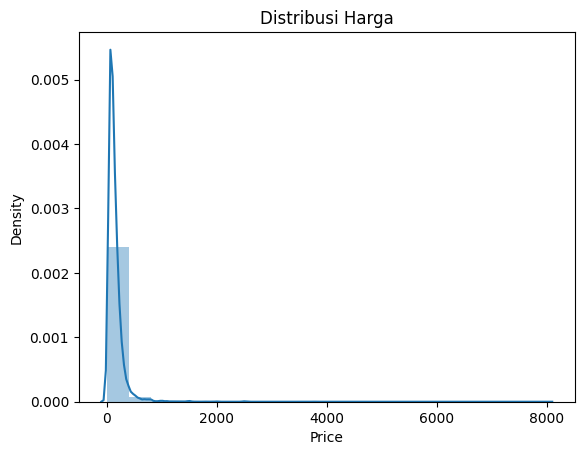

In [45]:
# Buat visualisasi distribusi dari kolom prices
import seaborn as sns
sns.distplot(data['price'], bins = 20)
plt.title('Distribusi Harga')
plt.xlabel('Price')
plt.ylabel('Density')
plt.plot()

**Challenge 3**: Kita buat supaya kolom `room_type` benar-benar rapi secara kategori.

In [48]:
# Cetak supaya tahu kategori apa saja yang ada di kolom `room_type`
room_type = data['room_type'].unique()
print(room_type)

['Private room' 'Entire home/apt' 'Private' 'Shared room' 'PRIVATE ROOM'
 'home' '   Shared room      ']


In [49]:
# Buat supaya semua berubah menjadi huruf kecil
data['room_type'] = data['room_type'].str.lower()
data['room_type'].unique()

array(['private room', 'entire home/apt', 'private', 'shared room',
       'home', '   shared room      '], dtype=object)

In [50]:
# Buat supaya tidak ada spasi di awal dan akhir
data['room_type'] = data['room_type'].str.strip()
data['room_type'].unique()

array(['private room', 'entire home/apt', 'private', 'shared room',
       'home'], dtype=object)

In [57]:
# Ganti menjadi kategori 'Shared room', 'Entire place', 'Private room' dan 'Hotel room'
mapping = { 'private room': 'Private Room',
           'private': 'Private Room',
           'entire home/apt': 'Entire place',
            'shared room' : 'Shared room',
            'home' : 'Hotel room'
            }

data['room_type'] = data['room_type'].str.lower().replace(mapping, regex=False)
room_types = data['room_type'].unique()
print(room_types)

['Private Room' 'entire place' 'Shared room' 'hotel room']


In [58]:
# Cek 5 data teratas untuk melihat perubahan yang terjadi
data.head()

,Unnamed: 0,listing_id,name,host_id,host_name,neighbourhood_full,room_type,price,number_of_reviews,last_review,reviews_per_month,availability_365,rating,number_of_stays,5_stars,listing_added,latitude,longitude
0,0,13740704,"Cozy,budget friendly, cable inc, private entra...",20583125,Michel,"Brooklyn, Flatlands",Private Room,45.0,10,2018-12-12,0.70,85,4.100954,12.0,0.609432,2018-06-08,40.63222,-73.93398
1,1,22005115,Two floor apartment near Central Park,82746113,Cecilia,"Manhattan, Upper West Side",entire place,135.0,1,2019-06-30,1.00,145,3.367600,1.2,0.746135,2018-12-25,40.78761,-73.96862
2,2,21667615,Beautiful 1BR in Brooklyn Heights,78251,Leslie,"Brooklyn, Brooklyn Heights",entire place,150.0,0,NaN,NaN,65,NaN,NaN,NaN,2018-08-15,40.70070,-73.99517
3,3,6425850,"Spacious, charming studio",32715865,Yelena,"Manhattan, Upper West Side",entire place,86.0,5,2017-09-23,0.13,0,4.763203,6.0,0.769947,2017-03-20,40.79169,-73.97498
4,4,22986519,Bedroom on the lively Lower East Side,154262349,Brooke,"Manhattan, Lower East Side",Private Room,160.0,23,2019-06-12,2.29,102,3.822591,27.6,0.649383,2020-10-23,40.71884,-73.98354


**Challenge 4**: Kita bersihkan **missing data**

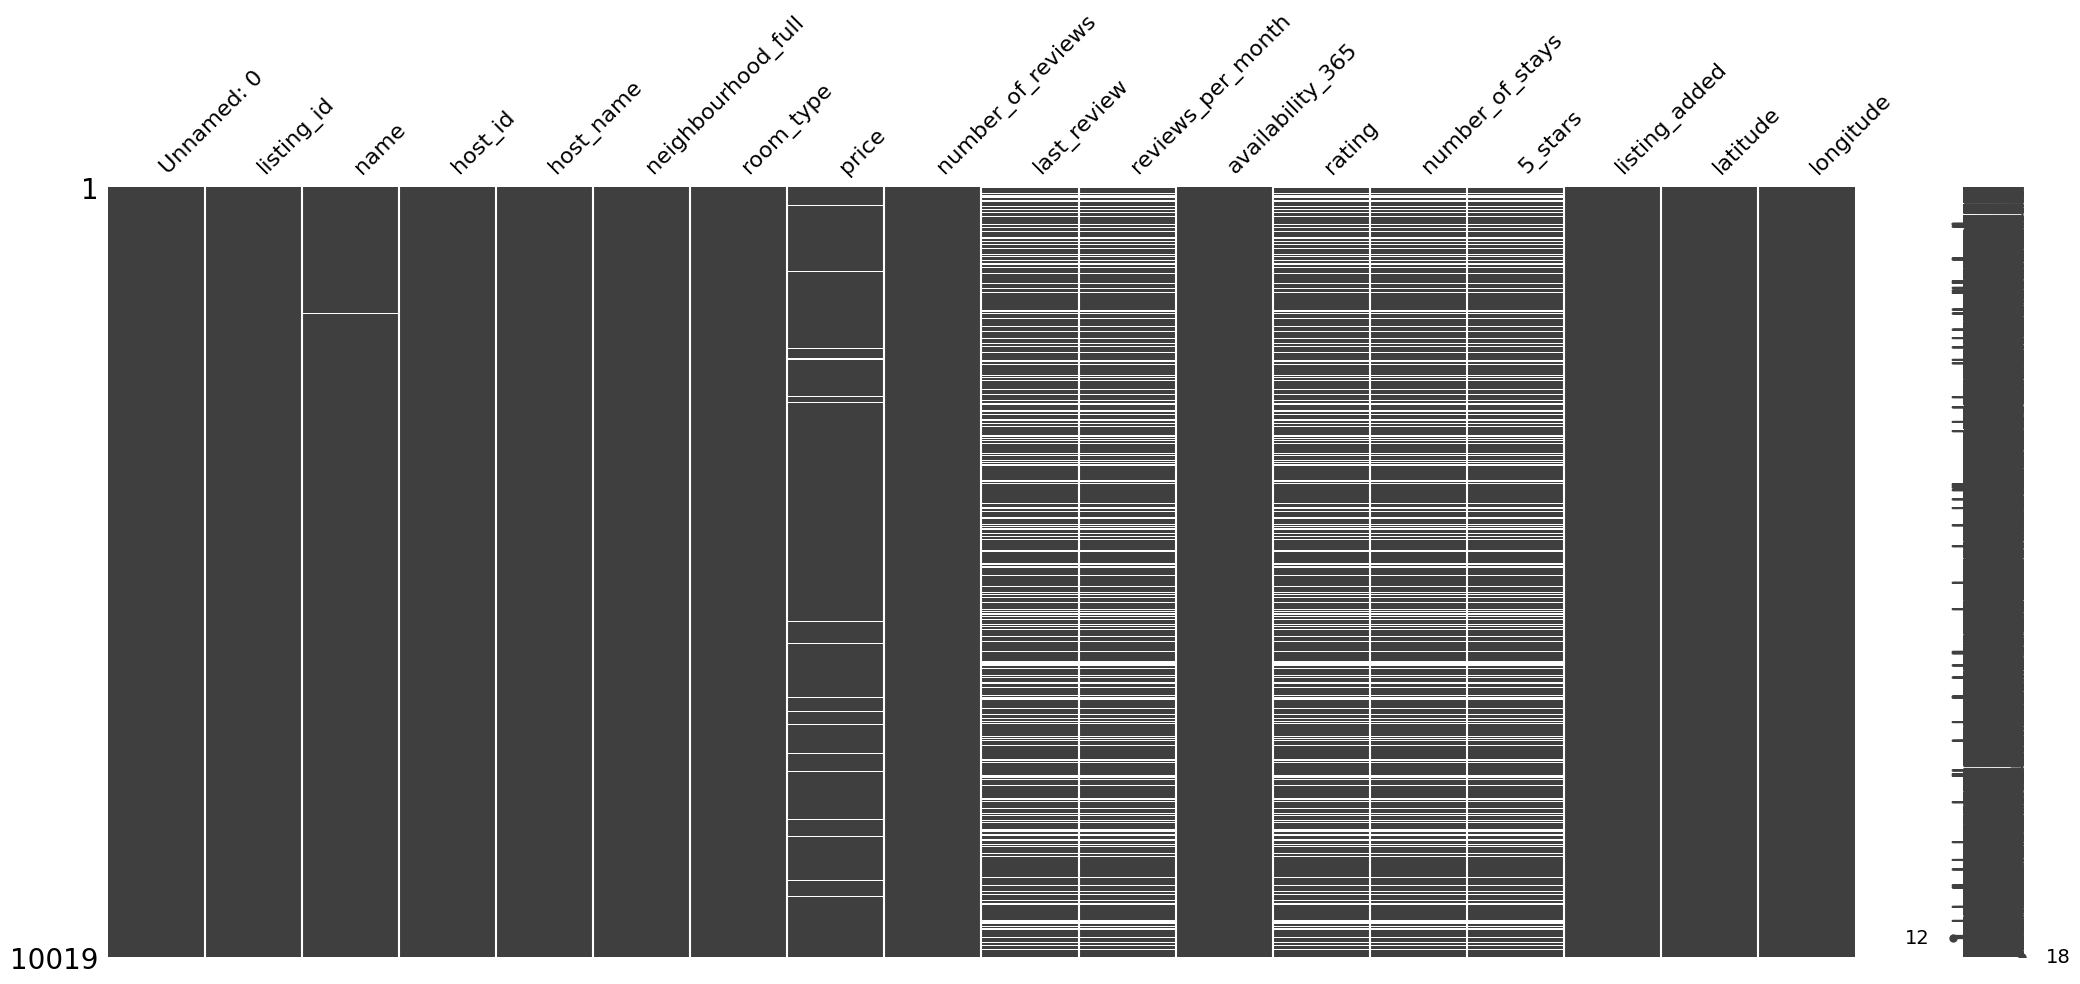

In [59]:
# Visualisasi missingness
msno.matrix(data)
plt.show()

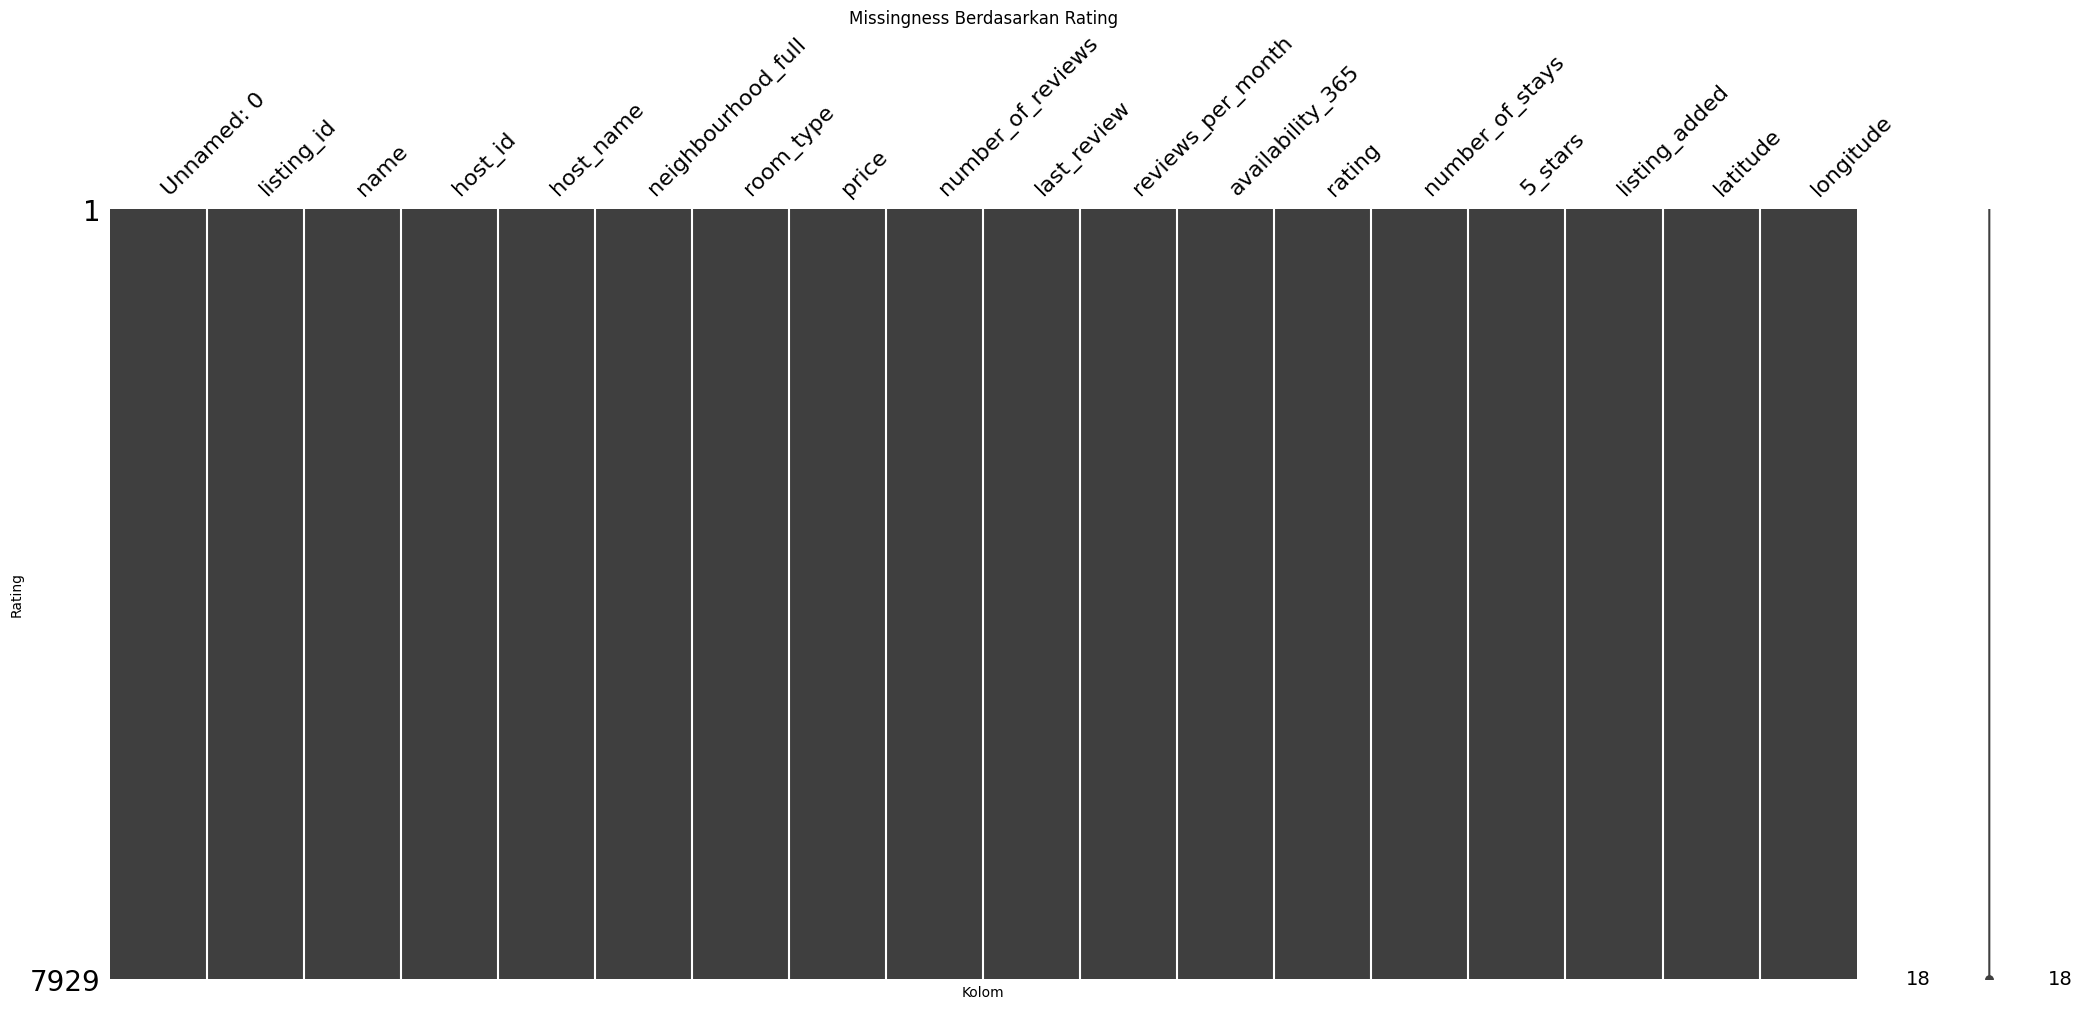

In [61]:
# Visualisasikan missingness berdasarkan rating
grouped = data.groupby('rating').apply(lambda x: x.isnull().sum())
msno.matrix(grouped)
plt.title('Missingness Berdasarkan Rating')
plt.xlabel('Kolom')
plt.ylabel('Rating')
plt.show()

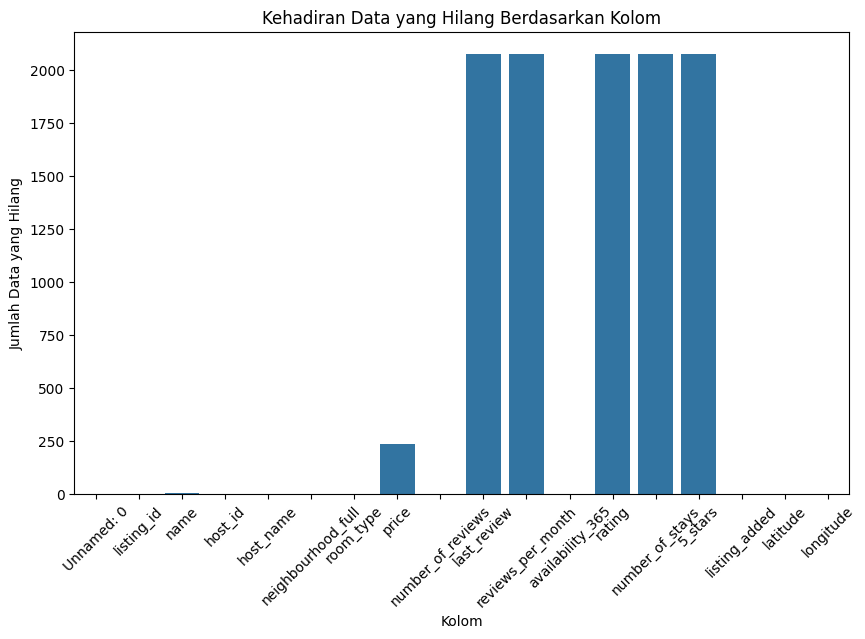

In [65]:
missing_counts = data.isnull().sum()
plt.figure(figsize=(10, 6))
sns.barplot(x=missing_counts.index, y=missing_counts.values)
plt.title('Kehadiran Data yang Hilang Berdasarkan Kolom')
plt.xlabel('Kolom')
plt.ylabel('Jumlah Data yang Hilang')
plt.xticks(rotation=45)
plt.show()

In [74]:
# Cek DataFrame yang ada missing values di kolom rating, number_of_stays, 5_stars, reviews_per_month
data.describe()

,Unnamed: 0,listing_id,host_id,price,number_of_reviews,reviews_per_month,availability_365,rating,number_of_stays,5_stars,latitude,longitude,sudah_dinilai
count,10019.000000,1.001900e+04,1.001900e+04,9781.000000,10019.000000,10019.000000,10019.000000,10019.000000,10019.000000,10019.000000,10019.000000,10019.000000,10019.0
mean,5009.000000,1.927634e+07,6.795923e+07,150.905122,22.459727,1.353894,112.284260,4.014458,33.991541,0.718599,40.729102,-73.951911,1.0
std,2892.380507,1.095056e+07,7.863106e+07,205.877428,43.173896,1.438390,131.636043,0.512057,49.943805,0.071215,0.054636,0.045910,0.0
min,0.000000,3.831000e+03,2.787000e+03,0.000000,0.000000,0.010000,0.000000,3.000633,1.200000,0.600026,40.508680,-74.239860,1.0
25%,2504.500000,9.674772e+06,7.910880e+06,69.000000,1.000000,0.290000,0.000000,3.648056,4.800000,0.670130,40.689880,-73.982845,1.0
50%,5009.000000,2.007030e+07,3.165167e+07,106.000000,5.000000,1.200000,44.000000,4.014458,20.400000,0.718599,40.723010,-73.955430,1.0
75%,7513.500000,2.933864e+07,1.074344e+08,180.000000,22.000000,1.550000,226.000000,4.382830,33.991541,0.750088,40.763390,-73.936065,1.0
max,10018.000000,3.648724e+07,2.741034e+08,8000.000000,510.000000,16.220000,365.000000,5.181114,612.000000,0.950339,40.913060,-73.719280,1.0


In [71]:
# Lakukan imputasi untuk missing data
data['number_of_stays'].fillna(data['number_of_stays'].mean(), inplace=True)
data['reviews_per_month'].fillna(data['reviews_per_month'].mean(), inplace=True)
data['rating'].fillna(data['rating'].mean(), inplace=True)
data['5_stars'].fillna(data['5_stars'].mean(), inplace=True)

In [72]:
# Buat kolom baru, beri nama sudah_dinilai
data['sudah_dinilai'] = data['rating'].notnull().astype(int)

In [73]:
# Cek data
data.head()

,Unnamed: 0,listing_id,name,host_id,host_name,neighbourhood_full,room_type,price,number_of_reviews,last_review,reviews_per_month,availability_365,rating,number_of_stays,5_stars,listing_added,latitude,longitude,sudah_dinilai
0,0,13740704,"Cozy,budget friendly, cable inc, private entra...",20583125,Michel,"Brooklyn, Flatlands",Private Room,45.0,10,2018-12-12,0.700000,85,4.100954,12.000000,0.609432,2018-06-08,40.63222,-73.93398,1
1,1,22005115,Two floor apartment near Central Park,82746113,Cecilia,"Manhattan, Upper West Side",entire place,135.0,1,2019-06-30,1.000000,145,3.367600,1.200000,0.746135,2018-12-25,40.78761,-73.96862,1
2,2,21667615,Beautiful 1BR in Brooklyn Heights,78251,Leslie,"Brooklyn, Brooklyn Heights",entire place,150.0,0,NaN,1.353894,65,4.014458,33.991541,0.718599,2018-08-15,40.70070,-73.99517,1
3,3,6425850,"Spacious, charming studio",32715865,Yelena,"Manhattan, Upper West Side",entire place,86.0,5,2017-09-23,0.130000,0,4.763203,6.000000,0.769947,2017-03-20,40.79169,-73.97498,1
4,4,22986519,Bedroom on the lively Lower East Side,154262349,Brooke,"Manhattan, Lower East Side",Private Room,160.0,23,2019-06-12,2.290000,102,3.822591,27.600000,0.649383,2020-10-23,40.71884,-73.98354,1


**Challenge 5**: Hapus kolom-kolom berikut


1.   neighbourhood_full
2.   number_of_reviews
3.   last_review
4.   reviews_per_month
5.   availability_365
6.   number_of_stays
7.   5_stars
8.   listing_added









In [75]:
# Hapus beberapa kolom yang tidak dibutuhkan
to_drop = ['neighbourhood_full',
        'number_of_reviews',
        'last_review',
        'reviews_per_month',
        'availability_365',
        'number_of_stays',
        '5_stars',
        'listing_added']
data.drop(to_drop, inplace=True, axis=1)

In [76]:
# Tampilkan data
data.head(10)

,Unnamed: 0,listing_id,name,host_id,host_name,room_type,price,rating,latitude,longitude,sudah_dinilai
0,0,13740704,"Cozy,budget friendly, cable inc, private entra...",20583125,Michel,Private Room,45.0,4.100954,40.63222,-73.93398,1
1,1,22005115,Two floor apartment near Central Park,82746113,Cecilia,entire place,135.0,3.367600,40.78761,-73.96862,1
2,2,21667615,Beautiful 1BR in Brooklyn Heights,78251,Leslie,entire place,150.0,4.014458,40.70070,-73.99517,1
3,3,6425850,"Spacious, charming studio",32715865,Yelena,entire place,86.0,4.763203,40.79169,-73.97498,1
4,4,22986519,Bedroom on the lively Lower East Side,154262349,Brooke,Private Room,160.0,3.822591,40.71884,-73.98354,1
5,5,271954,Beautiful brownstone apartment,1423798,Aj,entire place,150.0,4.478396,40.73388,-73.99452,1
6,6,33473567,Hamilton Heights Full Floor Garden Apt,33388853,Christine,entire place,200.0,4.014458,40.83090,-73.94308,1
7,7,14218742,Luxury/3bedroom/3bthrm/Privateprkng/beach/rstrnts,78824908,Ilona,entire place,224.0,4.091228,40.58531,-73.93811,1
8,8,15125599,Beautiful One Bedroom Apartment Near Central Park,3191545,Kyle,entire place,169.0,3.562947,40.76100,-73.98522,1
9,9,24553891,Enjoy all of Manhattan. Big Apple! A Mini-MOMA!,68557372,Shannon,entire place,75.0,4.695769,40.80667,-73.95182,1
